In [1]:
import pymongo
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [3]:
file = "dataset.csv"

In [4]:
db = client["Dataset_mongo"]

In [5]:
dataset = db['Dataset']

Function to find time differnence

In [6]:
import datetime
import dateutil.parser
def find_time_sec(ndate,udate):
    ndate = dateutil.parser.parse(ndate)
    udate = dateutil.parser.parse(udate)
    diff_time = ndate - udate
    diff = str(diff_time)
    time_lst = diff.split(':')
    sec = time_lst[2].split('.')
    x = diff.find('.')
    if x != -1:
        time_in_seconds = int(time_lst[0])*3600 + int(time_lst[1])*60 + int(sec[0]) + int(sec[1])/1000000
    else:
        time_in_seconds = int(time_lst[0])*3600 + int(time_lst[1])*60 + int(time_lst[2])
    return time_in_seconds

Inputs

In [7]:
start_time = '2021-03-23T04:20:16.500Z'
end_time = '2021-03-23T05:20:16.500Z'
main_program_signal = 'MainProgram_path1_OP20MAKINO_861'
signal_name = 'ServoLoad_2_path1_OP20MAKINO_861'
main_program = '//CNC_MEM/USER/LIBRARY/O2100'
machine_name = 'OP20MAKINO_861'

Finding values of main program in given time

In [8]:
query = dataset.find({"$and":[{"updatedate":{"$gte":start_time}}, #O2100
                            {"enddate":{"$lte":end_time}},
                            {"signalname":{'$eq':main_program_signal}},
                            {"L1Name":{'$eq':machine_name}}
                           ]},
                  {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
list_main_prog = list(query)
main_prog = pd.DataFrame(list_main_prog)

In [9]:
main_prog.head(20)

,_id,updatedate,enddate,timespan,signalname,value
0,60596e4e18e2863a9487a859,2021-03-23T04:25:19.500Z,2021-03-23T04:27:58.000Z,158.5,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O1000
1,60596f8018e2863a94891a85,2021-03-23T04:27:58.000Z,2021-03-23T04:33:04.000Z,306.0,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O2100
2,6059700f18e2863a9489a652,2021-03-23T04:33:04.000Z,2021-03-23T04:35:27.500Z,143.5,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O1000
3,6059713f18e2863a948b121e,2021-03-23T04:35:27.500Z,2021-03-23T04:40:30.500Z,303.0,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O2100
4,605971b418e2863a948b8e47,2021-03-23T04:40:30.500Z,2021-03-23T04:42:28.000Z,117.5,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O1000
5,6059724318e2863a948c4e80,2021-03-23T04:42:28.000Z,2021-03-23T04:44:51.000Z,143.0,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O2100
6,6059725c18e28600b8b154f4,2021-03-23T04:45:13.000Z,2021-03-23T04:45:16.000Z,3.0,MainProgram_path1_OP20MAKINO_861,NaN
7,6059725f18e28600b8b16a00,2021-03-23T04:45:16.000Z,2021-03-23T04:45:19.000Z,3.0,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O2100
8,605972ab18e2861d940eb2ff,2021-03-23T04:46:15.000Z,2021-03-23T04:46:35.000Z,20.0,MainProgram_path1_OP20MAKINO_861,NaN
9,605972e218e2861d940eff17,2021-03-23T04:46:35.000Z,2021-03-23T04:47:30.000Z,55.0,MainProgram_path1_OP20MAKINO_861,//CNC_MEM/USER/LIBRARY/O2100


In [10]:
main_prog['value'].value_counts()

//CNC_MEM/USER/LIBRARY/O2100    8
//CNC_MEM/USER/LIBRARY/O1000    7
Name: value, dtype: int64

Find range of signal value +-30% dynamically

In [11]:
group_signal = main_prog.groupby('value')
group = group_signal.get_group(main_program)
median_value = group['timespan'].median()

In [12]:
lower_bound = median_value - (30 * median_value)/100
upper_bound = median_value + (30 * median_value)/100

Finding values of signal in given time

In [13]:
query = dataset.find({"$and":[{"updatedate":{"$gte":start_time}}, #O2100
                            {"enddate":{"$lte":end_time}},
                            {"signalname":{'$eq':signal_name}},
                            {"L1Name":{'$eq':machine_name}}
                           ]},
                  {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
list_signal = list(query)
signals = pd.DataFrame(list_signal)

In [14]:
signals.head()

,_id,updatedate,enddate,timespan,signalname,value
0,60596c8318e2863a9485bcce,2021-03-23T04:20:16.500Z,2021-03-23T04:20:18.500Z,2.0,ServoLoad_2_path1_OP20MAKINO_861,1.0
1,60596c8518e2863a9485be69,2021-03-23T04:20:18.500Z,2021-03-23T04:20:21.000Z,2.5,ServoLoad_2_path1_OP20MAKINO_861,13.0
2,60596c8a18e2863a9485c270,2021-03-23T04:20:21.000Z,2021-03-23T04:20:26.000Z,5.0,ServoLoad_2_path1_OP20MAKINO_861,0.0
3,60596c8c18e2863a9485c47e,2021-03-23T04:20:26.000Z,2021-03-23T04:20:28.000Z,2.0,ServoLoad_2_path1_OP20MAKINO_861,10.0
4,60596c8e18e2863a9485c696,2021-03-23T04:20:28.000Z,2021-03-23T04:20:30.000Z,2.0,ServoLoad_2_path1_OP20MAKINO_861,36.0


In [15]:
# print(signals['timespan'].max())
# print(signals['timespan'].min())

Function to plot data points

In [28]:
def plot_data():
    r = np.random.random()
    b = np.random.random()
    g = np.random.random()
    color = (r, g, b)
#     plt.figure(figsize=(8,6))
    axes.plot(time, cycle_data['ServoLoad_2_path1_OP20MAKINO_861'], color = color)
#     axes.legend()

Converting to cyclic

5


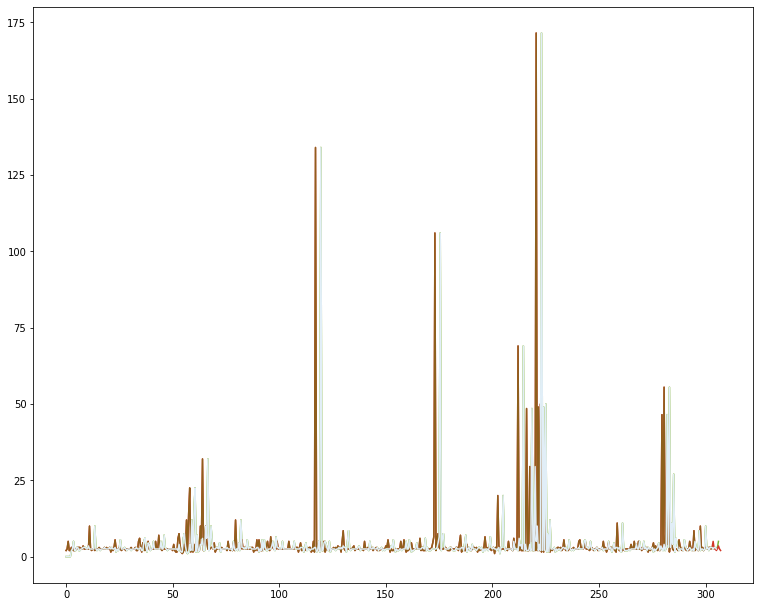

In [30]:
lst_sign = []
lst_sign.append(signal_name)
# print(lst_sign)
fig = plt.figure(figsize=(10,8))
axes = fig.add_axes([0, 0, 1, 1])
no_of_plots = 0
for i in range(len(main_prog)):
#     print(main_prog.iloc[i,5])
    if main_prog.iloc[i,5] == main_program and main_prog.iloc[i,3] > lower_bound and main_prog.iloc[i,3] < upper_bound:
        start_time = main_prog.iloc[i,1]
        end_time = main_prog.iloc[i,2]
        index = signals[(signals['updatedate'] >= main_prog.iloc[i,1])].index.to_numpy()
#         print(signals.iloc[index[0],])
        
#         print(main_prog.iloc[i,3])
        time = np.arange(0,main_prog.iloc[i,3]+0.5,0.5)
        time = list(time)
        cycle_data = pd.DataFrame(columns = lst_sign,index = time)
#         time_diff = 0
        time_diff = find_time_sec(signals.iloc[index[0],1], main_prog.iloc[i,1])
        end = main_prog.iloc[i,3]
#         print("/",end)
#         print("*",time_diff)
        for j in range(len(signals)):
            if time_diff <= end:
                cycle_data.at[time_diff,signal_name] = signals.iloc[j,3]
                time_diff += 0.5 
#         print(cycle_data.head(10))
        cycle_data = cycle_data.replace(to_replace = np.nan, value = 0)
        plot_data()
        no_of_plots += 1
# plt.xlabel('time')
# plt.ylabel('values')
# plt.figure(figsize=(8,6))
# plt.show()
print(no_of_plots)